# Road Traffic Vehicle Counting Exam

In this exam, you will use the YOLO (You Only Look Once) object detection model to analyze a video of road traffic. Your primary task is to count the number of vehicles exiting the road at each of the four exits (located at the top, bottom, left, and right of the frame). The video for this task is provided at `Datasets/YOLO_Exam_Video.mp4`.

## Objectives
- Load and process the video using OpenCV.
- Utilize the YOLO model to detect vehicles in each frame.
- Manipulate the video frames using OpenCV.
- Track vehicles as they move across the video frames.
- Count the number of vehicles exiting via the top street.
- Count the number of vehicles exiting via the bottom street.
- Count the number of vehicles exiting via the left street.
- Count the number of vehicles exiting via the right street.


## Setup Environment

Before you begin, ensure you have the necessary libraries installed. You will need `opencv`, and `ultralytics` among others.
If these are not installed, you should install them.

In [ ]:
# prompt: library opencv

!pip install opencv-python


In [ ]:
!pip install ultralytics
!pip install opencv-p

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.8/41.8 kB 603.9 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 872.3/872.3 kB 4.7 MB/s eta 0:00:00
ERROR: Could not find a version that satisfies the requirement opencv-p (from versions: none)
ERROR: No matching distribution found for opencv-p


In [ ]:
from ultralytics import YOLO
import os
from IPython.display import Image, display
from IPython import display
display.clear_output()
import cv2
from tqdm.auto import tqdm
import xml.etree.ElementTree as ET
import tensorflow as tf
from tensorflow import keras
import numpy as np

## Load the YOLO Model

You will first need to load the YOLO model, there is a custom model for this exam called `YOLO_Model.pt` under Datasets file ⚠️ PLEASE USE THIS MODEL AND DO NOT USE ANY OTHER MODEL ⚠️.
Write the code to load the YOLO model below:

In [ ]:
import cv2
from ultralytics import YOLO

model = YOLO('yolov8n.pt')

100%|██████████| 6.25M/6.25M [00:00<00:00, 46.3MB/s]


In [ ]:
model = YOLO("YOLO_Model.pt")

In [ ]:
!pip install gdown
import gdown

# Google Drive file ID
file_id = "1kGr6wC4U90vHjN1jihxHiA6o3MKy9iI-"
url = f"https://drive.google.com/uc?id={file_id}"
# Destination path
output_path = "/content/input_video.mp4"
gdown.download(url, output_path, quiet=False)
print(f"File downloaded successfully to {output_path}!")

Downloading...
From: https://drive.google.com/uc?id=1kGr6wC4U90vHjN1jihxHiA6o3MKy9iI-
To: /content/input_video.mp4
100%|██████████| 13.1M/13.1M [00:00<00:00, 194MB/s]

File downloaded successfully to /content/input_video.mp4!


## Prepare the Video Capture

Create a variable to capture the video frames, you can use `cv2.VideoCapture()` to achive this.

In [ ]:
video_path = 'input_video.mp4'
cap = cv2.VideoCapture(video_path)

## Get Video Information

You can use `cv2` library to get these information fro the `VideoCapture()` variable you created to extract these information:
* `height`: Video's height.
* `width`: Video's width.
* `fps`: Video's frames.

In [ ]:
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = int(cap.get(cv2.CAP_PROP_FPS))

## Prepare Video Writer to Store the Output

Create a variable that uses `cv2.VideoCapture()` to save the video with the bounding boxes, specified Region of Interest rectangle (ROI) and the counted vehicles on each sides. You will need to make the video with the same `fps`, `width`, `height`, and specify the codec and output path of the video.

In [ ]:
output_path = '/content/output_video_with_predictions.mp4'
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter(output_path, fourcc, fps, (width, height))

## Expermint to get the `(x1, y1, x2, y2)` of the ROI

### Hint
When defining the Regions of Interest (ROIs) for detecting vehicles exiting the road, consider the coordinates that outline the relevant areas. These coordinates can be specified as `(x1, y1, x2, y2)`, where `(x1, y1)` is the top-left corner and `(x2, y2)` is the bottom-right corner of the rectangle.

Experiment with different coordinates to accurately cover the streets where vehicles exit. Visualize these ROIs by drawing rectangles on a frame of the video and adjust the coordinates as needed until you capture the desired areas effectively.

In [ ]:
color = (0, 255, 0)
thickness = 2
font = cv2.FONT_HERSHEY_SIMPLEX
font_scale = 0.5
font_thickness = 1

ret = True
while ret:
    ret, frame = cap.read()

    if not ret:
        break


    class_counts = {}

    results = model.track(frame, persist=True)

    for result in results:
        for obj in result.boxes:
            bbox = obj.xyxy[0].cpu().numpy()  # Bounding box coordinates
            class_id = int(obj.cls[0].cpu().numpy()) if obj.cls is not None else -1  # Class ID
            conf = obj.conf[0].cpu().numpy() if obj.conf is not None else 0.0  # Confidence score
            id = int(obj.id[0].cpu().numpy()) if obj.id is not None else -1  # Unique ID


            if class_id not in class_counts:
                class_counts[class_id] = 0
            class_counts[class_id] += 1


            x1, y1, x2, y2 = map(int, bbox)

            cv2.rectangle(frame, (x1, y1), (x2, y2), color, thickness)


            label = f'ID: {id} Class: {class_id} Conf: {conf:.2f}'


            cv2.putText(frame, label, (x1, y1 - 10), font, font_scale, color, font_thickness, cv2.LINE_AA)


    text_offset = 20
    for class_id, count in class_counts.items():
        label = f'Class {class_id}: {count}'
        cv2.putText(frame, label, (10, height - text_offset), font, font_scale, color, font_thickness, cv2.LINE_AA)
        text_offset += 20

    out.write(frame)

cap.release()
out.release()

requirements: Ultralytics requirement ['lapx>=0.5.2'] not found, attempting AutoUpdate...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 9.6 MB/s eta 0:00:00

requirements: AutoUpdate success ✅ 3.4s, installed 1 package: ['lapx>=0.5.2']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect


0: 384x640 2 buss, 82 cars, 2 trucks, 2 vans, 4402.0ms
Speed: 20.8ms preprocess, 4402.0ms inference, 38.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 buss, 82 cars, 2 trucks, 2 vans, 3119.0ms
Speed: 17.6ms preprocess, 3119.0ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 buss, 82 cars, 2 trucks, 2 vans, 3899.7ms
Speed: 3.9ms preprocess, 3899.7ms inference, 5.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 buss, 82 cars, 2 trucks, 2 vans, 3848.6ms
Speed: 6.0ms preprocess, 3848.6ms inference, 7.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 buss, 82 cars, 2 trucks, 2 vans, 2925.6m

KeyboardInterrupt: 

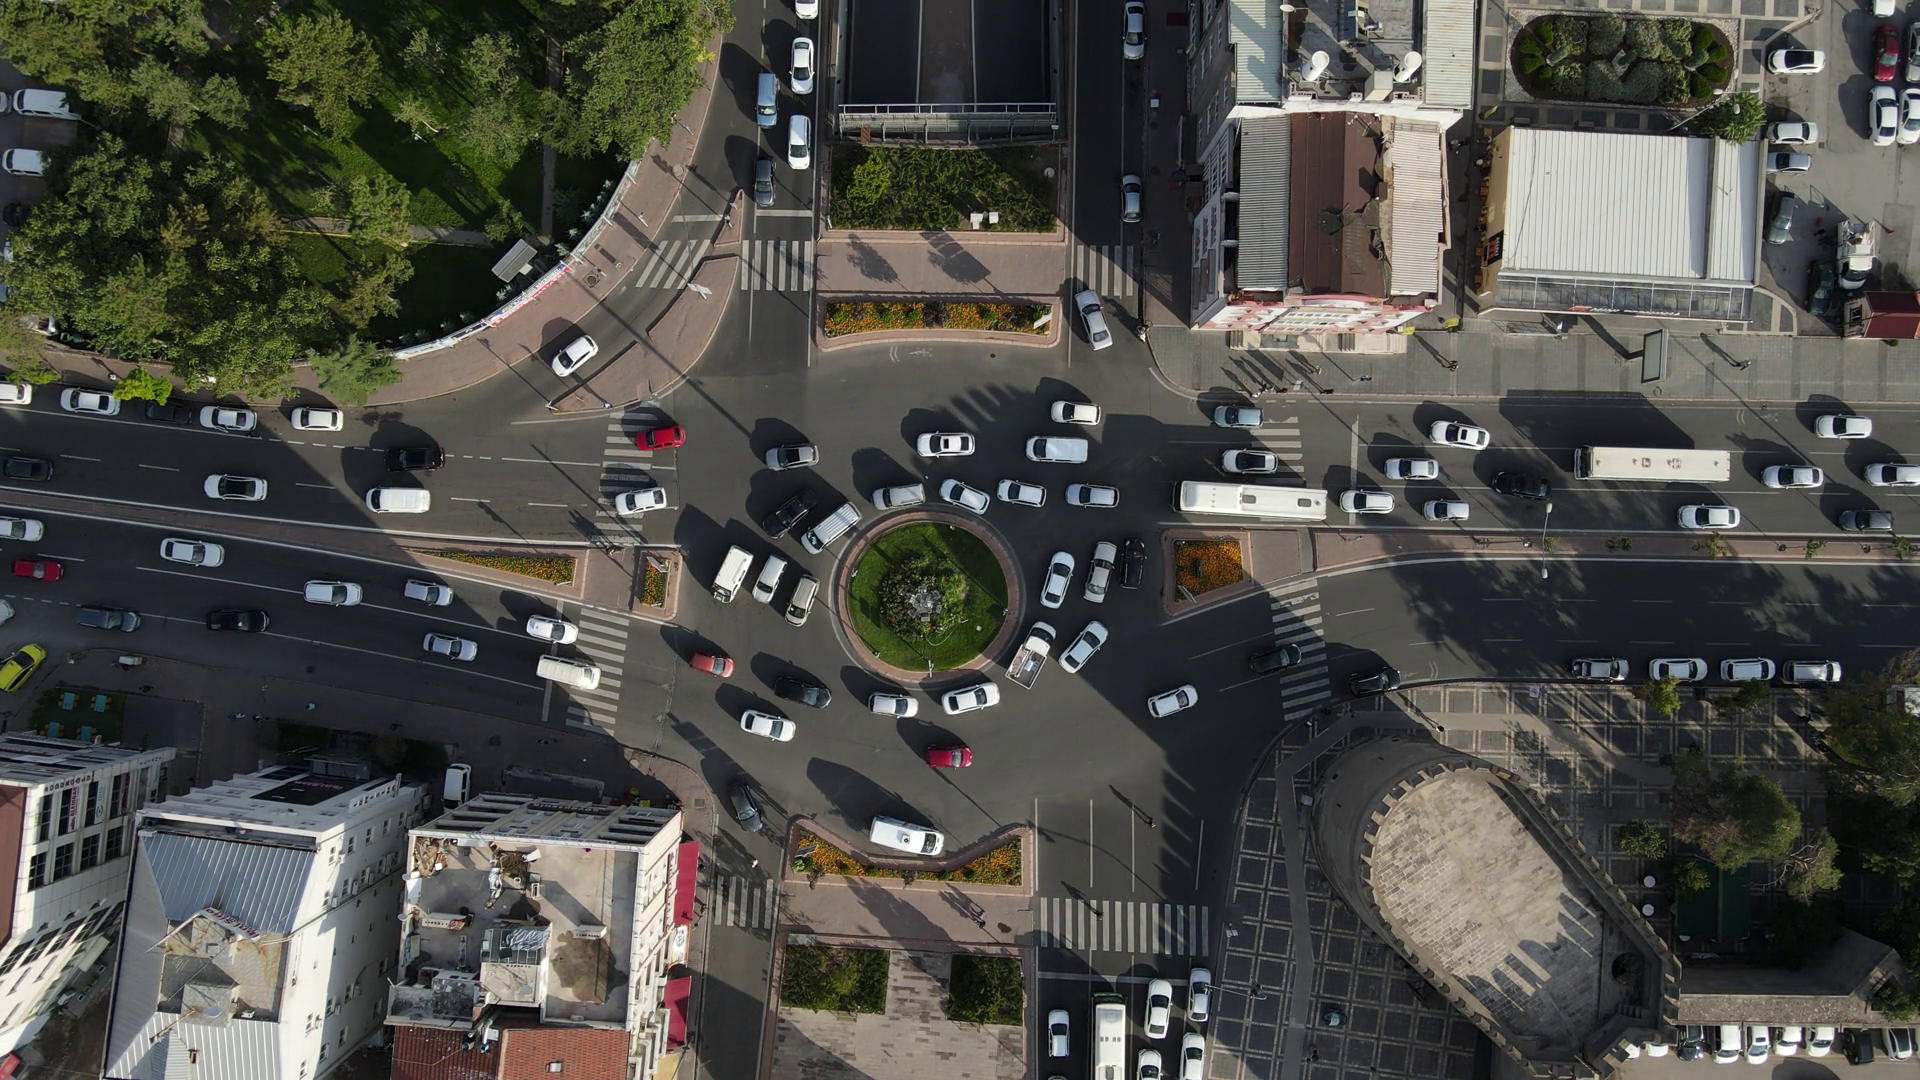

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

cv2_imshow(frame)

## Process Video Frames and Identify Vehicles Left the Road Form Each Street

For each frame in the video, use the YOLO model to detect and track vehicles. You will need to write a loop that processes each frame and applies the YOLO model.

In each frame, after detecting the vehicles, determine whether they exited the road via the top, bottom, left, or right street. You can use the positions of the bounding boxes provided by YOLO to do this.

- The video should display bounding boxes around the detected objects.
- The video should display your name on the top.
- It should display the calculated center of each vehicle.
- The video should display the confidence score, alongside the object ID and class ID of each detected and tracked object.
- The video should display the rectangles representing the regions where you count the vehicles that have crossed and exited.
- The video should display the number of vehicles that exited via the top street.
- The video should display the number of vehicles that exited via the bottom street.
- The video should display the number of vehicles that exited via the left street.
- The video should display the number of vehicles that exited via the right street.

In [ ]:

top_count = 0
bottom_count = 0
left_count = 0
right_count = 0

top_roi = (100, 50, 400, 120)  # Custom top ROI
bottom_roi = (800, 700, 200, 900)  # Custom bottom ROI
left_roi = (50, 100, 500, 200)  # Custom left ROI
right_roi = (width - 600, 200, width - 50, height - 600)  # Custom right ROI

cap = cv2.VideoCapture(video_path)


while cap.isOpened():

    success, frame = cap.read()

    if not success:
        break


    results = model.track(frame, persist=True)


    class_counts = {}


    for result in results:
        for obj in result.boxes:
            bbox = obj.xyxy[0].cpu().numpy()  # Bounding box coordinates
            class_id = int(obj.cls[0].cpu().numpy()) if obj.cls is not None else -1  # Class ID
            conf = obj.conf[0].cpu().numpy() if obj.conf is not None else 0.0  # Confidence score
            id = int(obj.id[0].cpu().numpy()) if obj.id is not None else -1  # Unique ID

            x1, y1, x2, y2 = map(int, bbox)


            center_x = int((x1 + x2) / 2)
            center_y = int((y1 + y2) / 2)


            if class_id not in class_counts:
                class_counts[class_id] = 0
            class_counts[class_id] += 1


            cv2.rectangle(frame, (x1, y1), (x2, y2), color, thickness)


            label = f'ID: {id} Class: {class_id} Conf: {conf:.2f}'


            cv2.putText(frame, label, (x1, y1 - 10), font, font_scale, color, font_thickness, cv2.LINE_AA)


            if top_roi[0] <= center_x <= top_roi[2] and top_roi[1] <= center_y <= top_roi[3]:
                if id not in [i for i in range(top_count)]:
                    top_count += 1
            if bottom_roi[0] <= center_x <= bottom_roi[2] and bottom_roi[1] <= center_y <= bottom_roi[3]:
                if id not in [i for i in range(bottom_count)]:
                    bottom_count += 1
            if left_roi[0] <= center_x <= left_roi[2] and left_roi[1] <= center_y <= left_roi[3]:
                if id not in [i for i in range(left_count)]:
                    left_count += 1
            if right_roi[0] <= center_x <= right_roi[2] and right_roi[1] <= center_y <= right_roi[3]:
                if id not in [i for i in range(right_count)]:
                    right_count += 1


    text_offset = 20
    for class_id, count in class_counts.items():
        label = f'Class {class_id}: {count}'
        cv2.putText(frame, label, (10, height - text_offset), font, font_scale, color, font_thickness, cv2.LINE_AA)
        text_offset += 20

    cv2.rectangle(frame, (top_roi[0], top_roi[1]), (top_roi[2], top_roi[3]), (0, 255, 0), 2)
    cv2.rectangle(frame, (bottom_roi[0], bottom_roi[1]), (bottom_roi[2], bottom_roi[3]), (0, 255, 0), 2)
    cv2.rectangle(frame, (left_roi[0], left_roi[1]), (left_roi[2], left_roi[3]), (0, 255, 0), 2)
    cv2.rectangle(frame, (right_roi[0], right_roi[1]), (right_roi[2], right_roi[3]), (0, 255, 0), 2)


    cv2.putText(frame, f'Top: {top_count}', (10, 30), font, font_scale, color, font_thickness, cv2.LINE_AA)
    cv2.putText(frame, f'Bottom: {bottom_count}', (10, 50), font, font_scale, color, font_thickness, cv2.LINE_AA)
    cv2.putText(frame, f'Left: {left_count}', (10, 70), font, font_scale, color, font_thickness, cv2.LINE_AA)
    cv2.putText(frame, f'Right: {right_count}', (10, 90), font, font_scale, color, font_thickness, cv2.LINE_AA)




    out.write(frame)


cap.release()
out.release()


0: 384x640 2 buss, 57 cars, 2 trucks, 2 vans, 2762.4ms
Speed: 6.2ms preprocess, 2762.4ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 buss, 83 cars, 2 trucks, 2 vans, 3548.2ms
Speed: 3.8ms preprocess, 3548.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 buss, 83 cars, 2 trucks, 2 vans, 3429.7ms
Speed: 6.9ms preprocess, 3429.7ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 buss, 83 cars, 2 trucks, 2 vans, 2728.1ms
Speed: 3.7ms preprocess, 2728.1ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 buss, 83 cars, 2 trucks, 2 vans, 2711.1ms
Speed: 3.7ms preprocess, 2711.1ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 buss, 83 cars, 2 trucks, 2 vans, 2936.7ms
Speed: 3.7ms preprocess, 2936.7ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 buss, 83 cars, 2 trucks, 2 vans, 4097.1ms
Speed: 11.1ms 

KeyboardInterrupt: 

## Save and Submit Your Work

In [ ]:
# video link
# https://drive.google.com/file/d/1y9arSbswf5VSYJoUyltU3Ls4CeF8p-Ao/view?usp=share_link

Submit both the notebook and the output video